In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import os
#pip install opencv-python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import cv2
import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt

DIR="/content/drive/MyDrive/ python ex/hhd_dataset/"
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory( # create Dataset objects in batches of 32 images
    DIR + "TRAIN",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    DIR + "TEST",
    image_size=(180, 180),
    batch_size=32)
validation_dataset= image_dataset_from_directory(
    DIR + "VALIDATION",
    image_size=(180, 180),
    batch_size=32)
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
batched_dataset = dataset.batch(32)
data_augmentation = keras.Sequential([layers.RandomRotation(0.01),
                                      layers.RandomZoom(0.02),])




Found 3492 files belonging to 27 classes.
Found 1130 files belonging to 27 classes.
Found 661 files belonging to 27 classes.
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


# Building the Model:

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=27, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

## Configuring the network for training

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## Playing with Dataset objects

**Displaying the shapes of the data and labels yielded by the `Dataset`**

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks=callbacks)

Epoch 1/30
110/110 [==============================] - 24s 161ms/step - loss: 3.1526 - accuracy: 0.1930 - val_loss: 1.9037 - val_accuracy: 0.4705
Epoch 2/30
110/110 [==============================] - 17s 148ms/step - loss: 1.2234 - accuracy: 0.6546 - val_loss: 1.9943 - val_accuracy: 0.3192
Epoch 3/30
110/110 [==============================] - 14s 118ms/step - loss: 0.8187 - accuracy: 0.7600 - val_loss: 0.8378 - val_accuracy: 0.7806
Epoch 4/30
110/110 [==============================] - 13s 117ms/step - loss: 0.6244 - accuracy: 0.8127 - val_loss: 2.5228 - val_accuracy: 0.3994
Epoch 5/30
110/110 [==============================] - 14s 126ms/step - loss: 0.4906 - accuracy: 0.8565 - val_loss: 0.8127 - val_accuracy: 0.7716
Epoch 6/30
110/110 [==============================] - 14s 118ms/step - loss: 0.3483 - accuracy: 0.8943 - val_loss: 1.7620 - val_accuracy: 0.4448
Epoch 7/30
110/110 [==============================] - 13s 118ms/step - loss: 0.2667 - accuracy: 0.9138 - val_loss: 0.8231 - val_ac

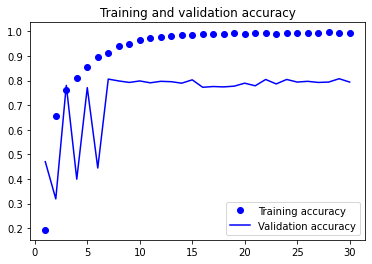

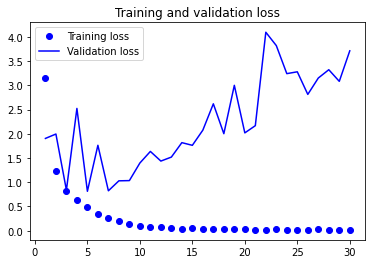

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

36/36 [==============================] - 4s 83ms/step - loss: 0.9239 - accuracy: 0.7593
Test accuracy: 0.759


# Using data augmentation

### Define a data augmentation stage to add to an image model

In [ ]:
data_augmentation = keras.Sequential([layers.RandomRotation(0.01),
                                      layers.RandomZoom(0.02),])

**Displaying some randomly augmented training images**

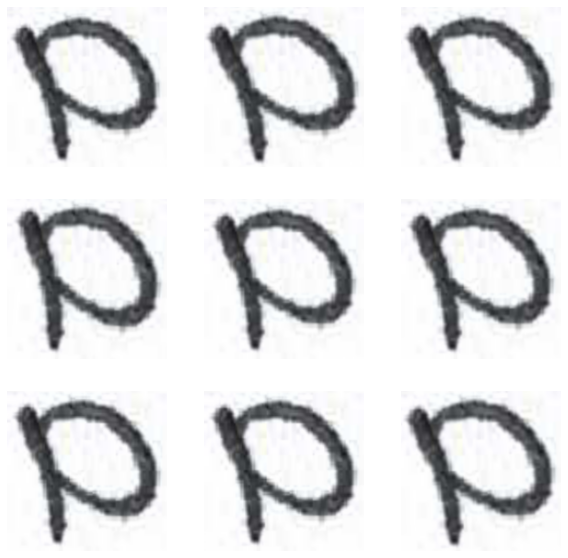

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): 
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(27, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized networks**

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)



Epoch 1/30
110/110 [==============================] - 16s 128ms/step - loss: 2.9181 - accuracy: 0.1836 - val_loss: 1.8282 - val_accuracy: 0.5446
Epoch 2/30
110/110 [==============================] - 14s 125ms/step - loss: 1.3017 - accuracy: 0.6366 - val_loss: 1.2824 - val_accuracy: 0.6415
Epoch 3/30
110/110 [==============================] - 14s 124ms/step - loss: 0.8927 - accuracy: 0.7514 - val_loss: 0.8690 - val_accuracy: 0.7413
Epoch 4/30
110/110 [==============================] - 14s 125ms/step - loss: 0.7149 - accuracy: 0.7892 - val_loss: 0.8496 - val_accuracy: 0.7595
Epoch 5/30
110/110 [==============================] - 14s 125ms/step - loss: 0.5967 - accuracy: 0.8227 - val_loss: 1.3147 - val_accuracy: 0.7307
Epoch 6/30
110/110 [==============================] - 14s 126ms/step - loss: 0.5316 - accuracy: 0.8428 - val_loss: 0.6289 - val_accuracy: 0.8290
Epoch 7/30
110/110 [==============================] - 14s 124ms/step - loss: 0.4553 - accuracy: 0.8568 - val_loss: 0.6680 - val_ac

**evaluating the the new model**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


36/36 [==============================] - 3s 73ms/step - loss: 0.7487 - accuracy: 0.7973
Test accuracy: 0.797


# Leveraging a pretrained model

**Feature extraction with a pretrained model**

Instantiating the VGG16 convolutional base

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Fast feature extraction without data augmentation**

Extracting the VGG16 features and corresponding labels

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(3492, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(27, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=22,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/22
110/110 [==============================] - 2s 10ms/step - loss: 25.9092 - accuracy: 0.6025 - val_loss: 15.8152 - val_accuracy: 0.7776
Epoch 2/22
110/110 [==============================] - 1s 9ms/step - loss: 9.8221 - accuracy: 0.8219 - val_loss: 14.8948 - val_accuracy: 0.7973
Epoch 3/22
110/110 [==============================] - 1s 8ms/step - loss: 7.7687 - accuracy: 0.8657 - val_loss: 20.6996 - val_accuracy: 0.7746
Epoch 4/22
110/110 [==============================] - 1s 8ms/step - loss: 5.2484 - accuracy: 0.9055 - val_loss: 19.7027 - val_accuracy: 0.7761
Epoch 5/22
110/110 [==============================] - 1s 8ms/step - loss: 4.0936 - accuracy: 0.9224 - val_loss: 16.1215 - val_accuracy: 0.8200
Epoch 6/22
110/110 [==============================] - 1s 8ms/step - loss: 3.4405 - accuracy: 0.9293 - val_loss: 18.2949 - val_accuracy: 0.7988
Epoch 7/22
110/110 [==============================] - 1s 9ms/step - loss: 3.3620 - accuracy: 0.9401 - val_loss: 19.9350 - val_accuracy: 0.82

**Plotting the results**

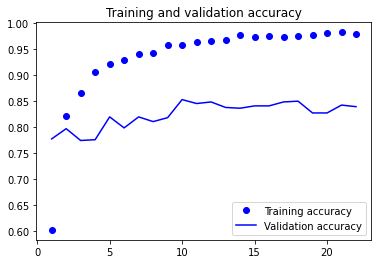

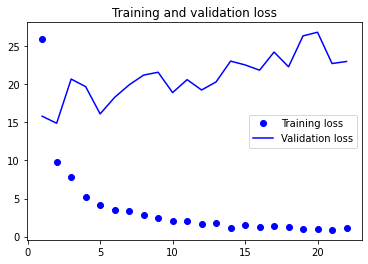

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential([layers.RandomRotation(0.01),
                                      layers.RandomZoom(0.02),])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(27, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
110/110 [==============================] - 34s 295ms/step - loss: 25.4282 - accuracy: 0.6074 - val_loss: 14.5246 - val_accuracy: 0.7413
Epoch 2/50
110/110 [==============================] - 33s 293ms/step - loss: 10.5123 - accuracy: 0.8021 - val_loss: 12.6386 - val_accuracy: 0.8064
Epoch 3/50
110/110 [==============================] - 33s 291ms/step - loss: 7.5898 - accuracy: 0.8645 - val_loss: 17.4315 - val_accuracy: 0.7988
Epoch 4/50
110/110 [==============================] - 33s 291ms/step - loss: 5.8631 - accuracy: 0.8972 - val_loss: 16.4706 - val_accuracy: 0.8396
Epoch 5/50
110/110 [==============================] - 33s 291ms/step - loss: 4.6107 - accuracy: 0.9127 - val_loss: 16.0879 - val_accuracy: 0.8351
Epoch 6/50
110/110 [==============================] - 32s 290ms/step - loss: 3.7077 - accuracy: 0.9278 - val_loss: 16.4014 - val_accuracy: 0.8230
Epoch 7/50
110/110 [==============================] - 33s 292ms/step - loss: 3.3878 - accuracy: 0.9333 - val_loss: 19.7562

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

36/36 [==============================] - 9s 234ms/step - loss: 13.5551 - accuracy: 0.8115
Test accuracy: 0.812


## Fine-tuning a pretrained model

In [ ]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
110/110 [==============================] - 39s 336ms/step - loss: 0.2448 - accuracy: 0.9928 - val_loss: 30.4793 - val_accuracy: 0.8563
Epoch 2/30
110/110 [==============================] - 37s 334ms/step - loss: 0.0789 - accuracy: 0.9963 - val_loss: 30.4278 - val_accuracy: 0.8593
Epoch 3/30
110/110 [==============================] - 37s 332ms/step - loss: 0.2754 - accuracy: 0.9943 - val_loss: 28.7960 - val_accuracy: 0.8699
Epoch 4/30
110/110 [==============================] - 37s 335ms/step - loss: 0.1706 - accuracy: 0.9966 - val_loss: 25.1760 - val_accuracy: 0.8638
Epoch 5/30
110/110 [==============================] - 37s 329ms/step - loss: 0.1797 - accuracy: 0.9974 - val_loss: 25.3667 - val_accuracy: 0.8638
Epoch 6/30
110/110 [==============================] - 37s 330ms/step - loss: 0.1494 - accuracy: 0.9960 - val_loss: 25.3752 - val_accuracy: 0.8654
Epoch 7/30
110/110 [==============================] - 37s 329ms/step - loss: 0.0957 - accuracy: 0.9971 - val_loss: 27.1403 -

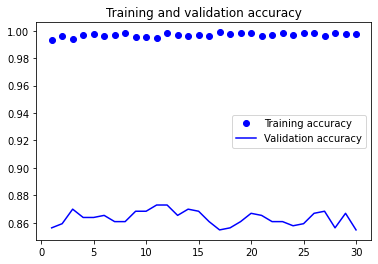

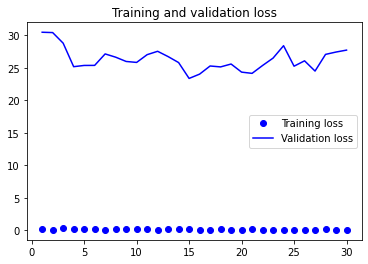

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

36/36 [==============================] - 9s 231ms/step - loss: 20.9052 - accuracy: 0.8575
Test accuracy: 0.858
